In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Chennai houseing sale.csv')
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [5]:
# Data exploration and cleaning (example steps)
# Handle missing values
data.dropna(inplace=True)

# Handle outliers
# You can use methods like z-score or IQR to detect and remove outliers
from scipy import stats
z_scores = stats.zscore(data['SALES_PRICE'])
data = data[(z_scores < 3)]

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

X = data[['INT_SQFT']]  # Replace with your selected features
y = data['SALES_PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


C:\Users\thama\AppData\Local\Temp\ipykernel_32864\3409199852.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [6]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha (L1 regularization strength)
lasso_model.fit(X_train, y_train)


Lasso()

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = lasso_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


MAE: 2237554.3149952088
MSE: 8517781286306.102
RMSE: 2918523.8197256676


In [8]:
# Assuming you have already defined X and y as your features and target variable
# Now, implement Ridge Regression

from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha (L2 regularization strength)
ridge_model.fit(X_train, y_train)


Ridge()

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = ridge_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = (mse) ** 0.5

print(f"Ridge Regression - MAE: {mae}")
print(f"Ridge Regression - MSE: {mse}")
print(f"Ridge Regression - RMSE: {rmse}")


Ridge Regression - MAE: 2237554.3149960316
Ridge Regression - MSE: 8517781286248.194
Ridge Regression - RMSE: 2918523.819715747


In [52]:
import pandas as pd

# Load your dataset
data = pd.read_csv('Employee Performance.csv')
data


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [53]:
X = data[['YearsAtCompany', 'YearsInCurrentRole']]
y = data['PerformanceRating']

In [54]:
from sklearn.linear_model import LinearRegression

# Create and fit the model
model = LinearRegression()
model.fit(X[['YearsAtCompany']], y)


LinearRegression()

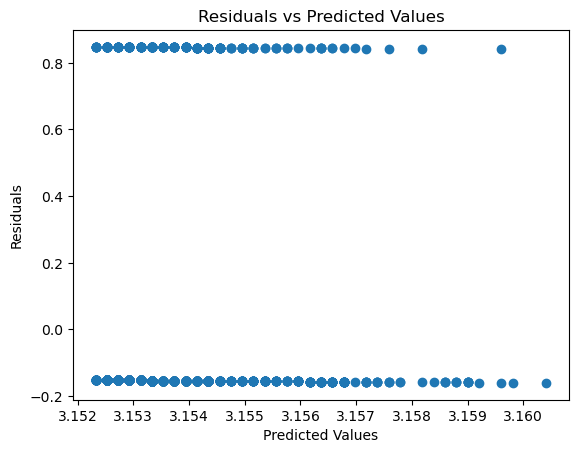

In [55]:
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
predictions=model.predict(X[['YearsAtCompany']])
# Calculate residuals
residuals = y - predictions
# Residuals vs. Predicted Values Plot
plt.scatter(predictions,residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
bp_test = het_breuschpagan(residuals, X)
print("Breusch-Pagan p-value:", bp_test[1])

In [ ]:
# To address heteroscedasticity through variable transformation:
X['YearsAtCompany'] = np.log(X['YearsAtCompany'])

from statsmodels.regression.linear_model import WLS
weights = 1 / (residuals**2)  
wls_model = WLS(y, X, weights=weights).fit()

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a correlation matrix
correlation_matrix = X.corr()

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [62]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

# Load the dataset (Diabetes dataset as an example)
data = datasets.load_diabetes()
X = data.data
y = data.target


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
base_model = LinearRegression()
base_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_base = base_model.predict(X_test)

# Evaluate the performance of the base model
base_mse = mean_squared_error(y_test, y_pred_base)
print("Base Model MSE:", base_mse)


Base Model MSE: 2900.1936284934804


In [65]:
# Define the degree of the polynomial features (you'll optimize this)
degree = 2  # Start with degree 2

# Create and fit the polynomial feature transformer
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train a linear regression model with polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate the performance of the polynomial model
poly_mse = mean_squared_error(y_test, y_pred_poly)
print(f"Polynomial Model (Degree {degree}) MSE:", poly_mse)


Polynomial Model (Degree 2) MSE: 3096.028307344268


In [66]:
best_degree = None
best_mse = float("inf")

for degree in range(1, 6):  # You can adjust the range as needed
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    y_pred_poly = poly_model.predict(X_test_poly)
    poly_mse = mean_squared_error(y_test, y_pred_poly)

    if poly_mse < best_mse:
        best_mse = poly_mse
        best_degree = degree

print(f"Best Polynomial Model (Degree {best_degree}) MSE:", best_mse)


Best Polynomial Model (Degree 1) MSE: 2900.1936284934827
